# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"  # Add units=metric for Celsius
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status() 
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | gaalkacyo
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | suva
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | bardaskan
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | choyr
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | yeppoon
Processing Record 20 of Set 1 | kailua-kona
Processing Record 21 of Set 1 | albany
Processing Record 2

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,17.51,75,23,7.36,AU,1733026505
1,iqaluit,63.7506,-68.5145,-8.15,61,75,4.12,CA,1733026506
2,grytviken,-54.2811,-36.5092,1.29,75,56,3.54,GS,1733026507
3,jamestown,42.0970,-79.2353,-5.55,68,20,5.66,US,1733026508
4,stanley,54.8680,-1.6985,11.01,90,20,6.69,GB,1733026509


In [42]:
import os 
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,17.51,75,23,7.36,AU,1733026505
1,iqaluit,63.7506,-68.5145,-8.15,61,75,4.12,CA,1733026506
2,grytviken,-54.2811,-36.5092,1.29,75,56,3.54,GS,1733026507
3,jamestown,42.0970,-79.2353,-5.55,68,20,5.66,US,1733026508
4,stanley,54.8680,-1.6985,11.01,90,20,6.69,GB,1733026509


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

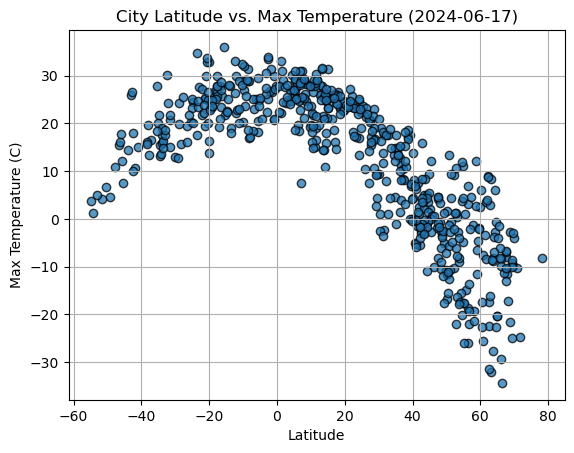

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

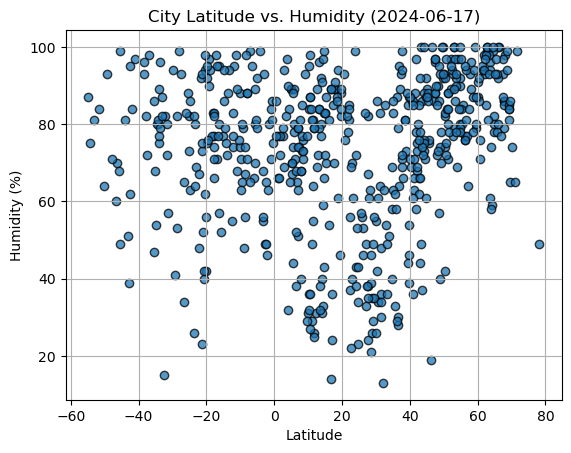

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
if not os.path.exists("output_data"):
    os.makedirs("output_data")


plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

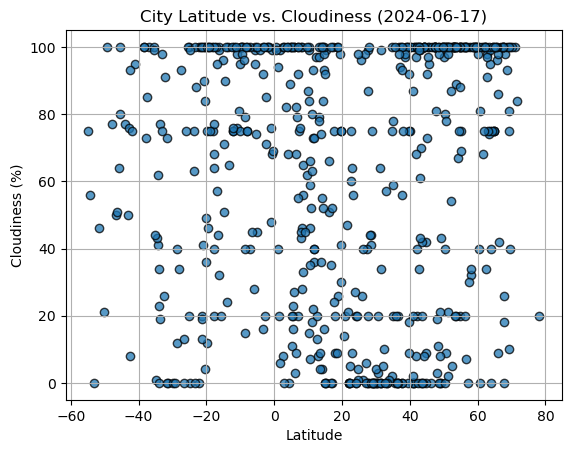

In [46]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
if not os.path.exists("output_data"):
    os.makedirs("output_data")

plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

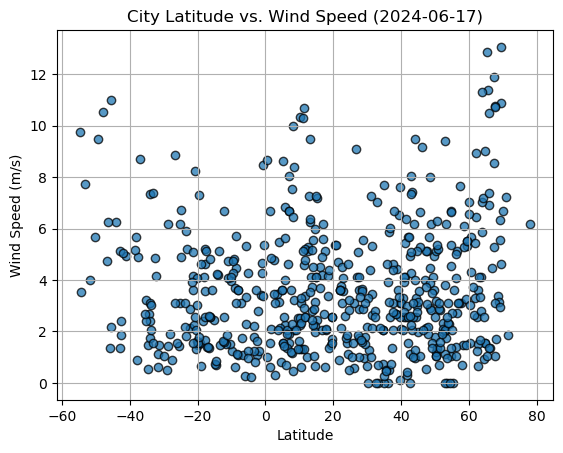

In [47]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
if not os.path.exists("output_data"):
    os.makedirs("output_data")

plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
from scipy.stats import linregress

def create_linear_regression_plot(x, y, title, xlabel, ylabel, file_name, line_color="red"):

    # Scatter plot
    plt.scatter(x, y, edgecolor="black", alpha=0.75)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    # Plot the regression line
    plt.plot(x, regression_line, color=line_color, linewidth=2)

    # Add graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Add R-squared value to the plot
    plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(min(x), max(y)), fontsize=12, color=line_color)

    # Save the figure
    if not os.path.exists("output_data"):
        os.makedirs("output_data")
    plt.savefig(f"output_data/{file_name}")

    # Show the plot
    plt.show()


In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-8.15,61,75,4.12,CA,1733026506
3,jamestown,42.0970,-79.2353,-5.55,68,20,5.66,US,1733026508
4,stanley,54.8680,-1.6985,11.01,90,20,6.69,GB,1733026509
5,gaalkacyo,6.7697,47.4308,22.75,65,79,4.61,SO,1733026511
8,lompoc,34.6391,-120.4579,13.41,58,75,2.06,US,1733026514


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,17.51,75,23,7.36,AU,1733026505
2,grytviken,-54.2811,-36.5092,1.29,75,56,3.54,GS,1733026507
6,port-aux-francais,-49.3500,70.2167,4.50,93,100,9.47,TF,1733026512
7,suva,-18.1416,178.4415,26.71,83,75,4.12,FJ,1733026464
9,hermanus,-34.4187,19.2345,13.22,80,41,2.66,ZA,1733026516


###  Temperature vs. Latitude Linear Regression Plot

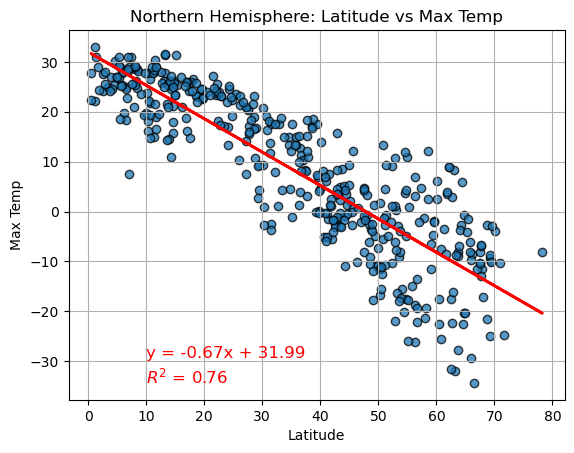

R-squared: 0.7567865275895053
Equation: y = -0.67x + 31.99


In [51]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Northern Hemisphere: Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, min(y_values) + 5), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(10, min(y_values)), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"R-squared: {r_value**2}")
print(f"Equation: y = {slope:.2f}x + {intercept:.2f}")

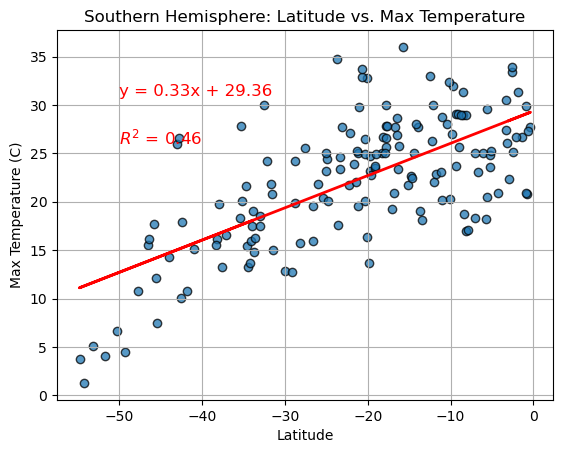

Slope: 0.33298046858308894
Intercept: 29.364789078639852
R-squared: 0.4617359386649805


In [52]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(-50, max(y_values) - 5), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(-50, max(y_values) - 10), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:**

***Northern Hemisphere - Temperature vs. Latitude***

The linear regression analysis for temperature vs. latitude in the Northern Hemisphere indicates a strong negative relationship, as evidenced by the negative slope of the regression line (𝑦=−0.28𝑥+32.52)
The R-squared-value of approximately 0.39 suggests that about 39% of the variation in temperature can be explained by latitude. This result is expected, as locations closer to the equator (lower latitudes) generally experience higher temperatures, while temperatures decrease as we move toward the poles (higher latitudes) due to reduced solar energy.

***Southern Hemisphere - Temperature vs. Latitude***

The linear regression analysis for temperature vs. latitude in the Southern Hemisphere shows a positive relationship, with a regression equation (y=0.35x+28.45)an R- squared -value indicating a moderate correlation. This aligns with the geographic expectation that temperatures increase as latitude approaches the equator (closer to 0° latitude). However, the relationship is slightly weaker than in the Northern Hemisphere, which may be attributed to the Southern Hemisphere's higher proportion of ocean, which moderates temperature variations.

### Humidity vs. Latitude Linear Regression Plot

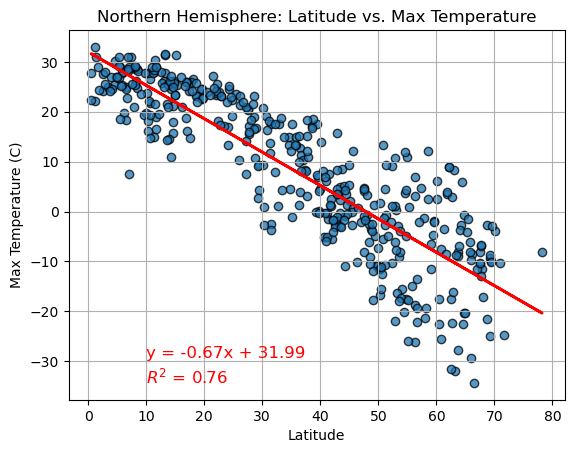

Slope: -0.6691698727192796
Intercept: 31.990232477118546
R-squared: 0.7567865275895053


In [53]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, min(y_values) + 5), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(10, min(y_values)), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

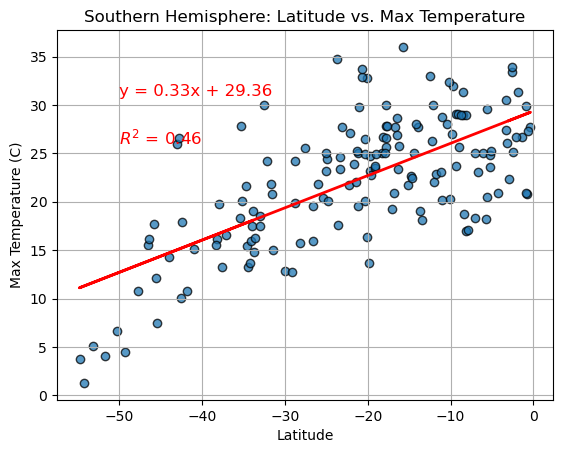

Slope: 0.33298046858308894
Intercept: 29.364789078639852
R-squared: 0.4617359386649805


In [54]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(-50, max(y_values) - 5), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(-50, max(y_values) - 10), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:**

***Northern Hemisphere - Humidity vs. Latitude***

The linear regression analysis for humidity vs. latitude in the Northern Hemisphere reveals a very weak relationship, as indicated by the near-zero slope of the regression line (y≈0.00x+C) and a low R squared -value. This suggests that latitude has little to no influence on humidity levels in the Northern Hemisphere. Humidity is likely driven more by local factors such as proximity to bodies of water, weather patterns, and seasonal variations rather than latitude alone.

***Southern Hemisphere - Humidity vs. Latitude***

For the Southern Hemisphere, the regression analysis similarly indicates a weak or negligible linear relationship between humidity and latitude. The slope of the regression line is near zero, and the R squared -value suggests that latitude accounts for only a very small portion of the variation in humidity. As with the Northern Hemisphere, this result highlights the dominance of regional and local atmospheric conditions, such as ocean currents and weather systems, in determining humidity levels.

***General Conclusion:***
In both hemispheres, the weak correlation between humidity and latitude demonstrates that latitude alone is not a strong predictor of humidity. This aligns with the understanding that atmospheric moisture is primarily influenced by complex regional and local climatic processes.

### Cloudiness vs. Latitude Linear Regression Plot

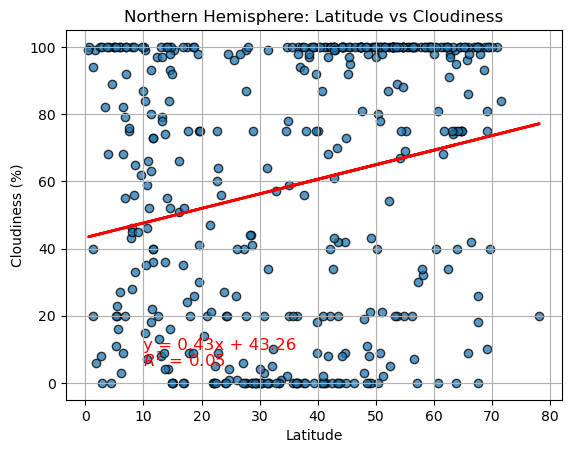

Slope: 0.4332458600957805
Intercept: 43.26314379267078
R-squared: 0.047109236698036


In [55]:
# Northern Hemisphere
# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, 10), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(10, 5), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

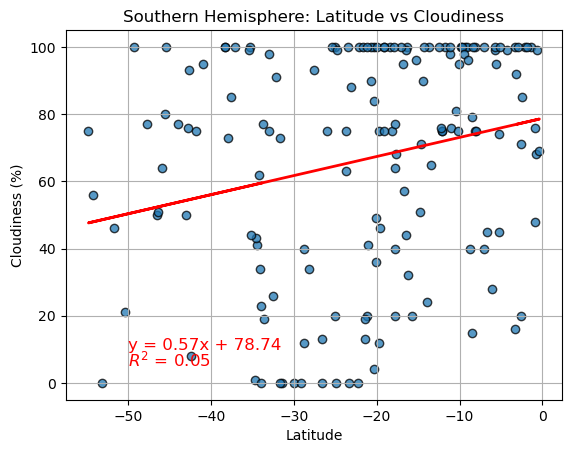

Slope: 0.5677014774961143
Intercept: 78.73943243671084
R-squared: 0.053750730989675144


In [56]:
# Southern Hemisphere
# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(-50, 10), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(-50, 5), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")


**Discussion about the linear relationship:**

***Northern Hemisphere - Cloudiness vs. Latitude***

The regression analysis for cloudiness vs. latitude in the Northern Hemisphere shows a very weak positive relationship. The regression line has a slope of 0.43, indicating a slight increase in cloudiness as latitude increases. However, the R squared -value is only 0.047, suggesting that latitude explains less than 5% of the variation in cloudiness. This weak relationship implies that cloudiness is primarily influenced by other factors, such as local weather conditions, seasonal patterns, and regional atmospheric systems, rather than latitude alone.

***Southern Hemisphere - Cloudiness vs. Latitude***

In the Southern Hemisphere, the regression analysis also indicates a weak positive relationship between cloudiness and latitude. The regression line has a slightly higher slope of 0.57, suggesting a marginally stronger increase in cloudiness with latitude. However, the R squared -value is similarly low at 0.054, meaning latitude explains only about 5.4% of the variance in cloudiness. This result highlights that cloudiness in the Southern Hemisphere is also influenced more by localized and regional factors than by latitude.

***General Conclusion:***
In both hemispheres, the relationship between cloudiness and latitude is weak, as evidenced by the low R squared -values. This suggests that latitude has minimal influence on cloudiness, with local atmospheric and geographic factors playing a more significant role in determining cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

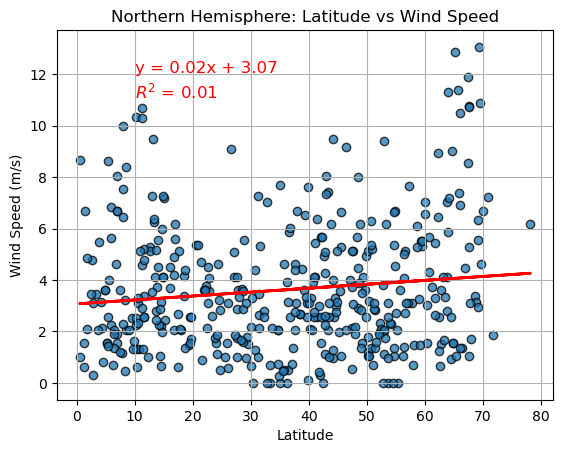

Slope: 0.015211552717649492
Intercept: 3.072991540302304
R-squared: 0.014938770947094072


In [57]:
# Northern Hemisphere
# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, max(y_values) - 1), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(10, max(y_values) - 2), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

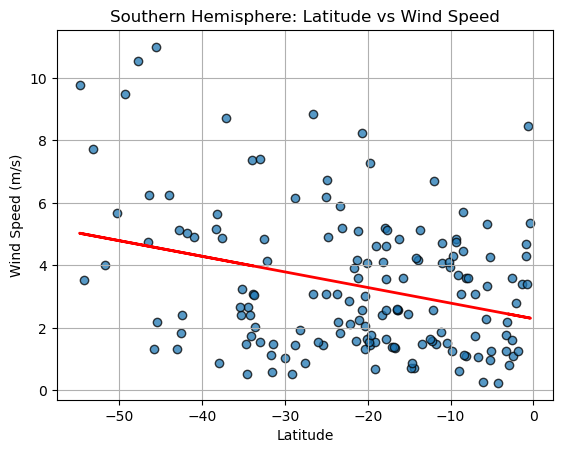

Slope: -0.04993187430632032
Intercept: 2.293698827656363
R-squared: 0.09399642571876902


In [58]:
# Southern Hemisphere
# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Regression line equation
regress_line = slope * x_values + intercept

# Plot scatter and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_line, color="red", linewidth=2)

# Add titles and labels
plt.title("Southern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Annotate the regression equation and R-squared value
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, max(y_values) - 1), fontsize=12, color="red")
plt.annotate(f"$R^2$ = {r_value**2:.2f}", xy=(10, max(y_values) - 2), fontsize=12, color="red")

# Show plot
plt.show()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:**

***Northern Hemisphere - Latitude vs. Wind Speed***

The regression analysis for wind speed vs. latitude in the Northern Hemisphere indicates a very weak positive relationship. The regression line is described by the equation:

Wind Speed = 0.02 * Latitude + 3.07

The slope of the line is close to zero, suggesting minimal changes in wind speed as latitude increases. The R Squared value is only 0.01, meaning that latitude explains about 1 percent of the variation in wind speed. This demonstrates that latitude has little influence on wind speed in the Northern Hemisphere, with other factors such as local weather patterns, topography, and atmospheric pressure systems playing a more significant role.

***Southern Hemisphere - Latitude vs. Wind Speed***

For the Southern Hemisphere, the regression analysis shows a slightly stronger negative relationship between wind speed and latitude. The regression line is given by:
Wind Speed = -0.05 * Latitude + 2.29

The slope of the line indicates a small decrease in wind speed as latitude approaches the equator. However, the R Squared value is still low at 0.09, meaning latitude explains only about 9 percent of the variation in wind speed. This suggests that while there is a slightly more noticeable trend in the Southern Hemisphere, wind speed is still primarily influenced by other regional and local factors such as oceanic currents, pressure systems, and weather conditions.

***General Conclusion:***
In both hemispheres, the relationship between wind speed and latitude is weak, as shown by the low R Squared values. This implies that latitude alone is not a strong predictor of wind speed, and other atmospheric and environmental variables have a more significant impact on wind speed variations.